In [68]:
import json

# json_file = "./threshold_range.json"
json_file="./mnist_b_lenet_se_0-0.95-4bit.json"

with open(json_file) as json_data:
    data = json.load(json_data)


data

JSONDecodeError: Expecting value: line 2 column 1 (char 12540)

In [66]:
threshold_axis = []

exit_percs = []
accu_percs = []
comp_labels = []
for comp in data[0]['comps']:
  exit_percs.append([])
  accu_percs.append([])
  comp_labels.append(comp['name'])

for test in data:
  threshold_axis.append(test['comps'][0]['exit_threshs'][0])
  
  for i, comp in enumerate(test['comps']):
    exit_percs[i].append(comp['exit_percs'][0])
    accu_percs[i].append(comp['accu_percs'][0])

threshold_axis, comp_labels, exit_percs

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9],
 ['Softmax',
  'Trunc Base-2 Softmax',
  'Non-Trunc Base-2 Softmax',
  'Base-2 Sub-Softmax'],
 [[1.0, 1.0, 1.0, 1.0, 0.9991, 0.997, 0.9911, 0.9773, 0.9634],
  [1.0, 1.0, 0.9998, 0.9993, 0.996, 0.9888, 0.9833, 0.9533, 0.9237],
  [1.0, 1.0, 1.0, 0.9995, 0.9985, 0.9937, 0.9846, 0.962, 0.9334],
  [1.0, 1.0, 0.9998, 0.9993, 0.996, 0.9888, 0.9833, 0.9534, 0.9237]])

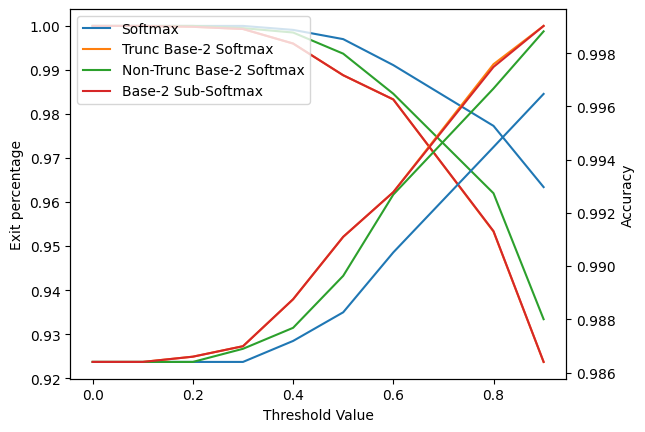

In [67]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

for label, y1, y2 in zip(comp_labels, exit_percs, accu_percs):
  ax1.plot(threshold_axis, y1, label=label)
  ax2.plot(threshold_axis, y2, label=label)
# plt.title('title name')
ax1.set_xlabel('Threshold Value')
ax1.set_ylabel('Exit percentage')
ax2.set_ylabel('Accuracy')
plt.legend()
plt.show()